weights_save_path: ./weights/raw/Ux7wJqFU.pth


Labels: ['yes', 'no', 'red', 'blue', '0', '1']
Number of Common Labels = 6 | n_classes = 6
V2: 	Train size = 1200             | Val size = 300 | Total = 1500
Abs: 	Train size = 1200             | Val size = 300 | Total = 1500
--------------------


Epoch [1/50]	                         Avg Train Loss: 1.110308	                         Avg Eval Loss: 1.098578	                         Avg Domain Accuracy: 0.50	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [2/50]	                         Avg Train Loss: 1.106905	                         Avg Eval Loss: 1.099929	                         Avg Domain Accuracy: 0.49	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [3/50]	                         Avg Train Loss: 1.103496	                         Avg Eval Loss: 1.095815	                         Avg Domain Accuracy: 0.51	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [4/50]	                         Avg Train Loss: 1.098141	                         Avg Eval Loss: 1.100288	                         Avg Domain Accuracy: 0.48	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [5/50]	                         Avg Train Loss: 1.106029	                         Avg Eval Loss: 1.102352	                         Avg Domain Accuracy: 0.51	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [6/50]	                         Avg Train Loss: 1.101072	                         Avg Eval Loss: 1.097647	                         Avg Domain Accuracy: 0.52	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.22


Epoch [7/50]	                         Avg Train Loss: 1.104733	                         Avg Eval Loss: 1.087555	                         Avg Domain Accuracy: 0.53	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.25


Epoch [8/50]	                         Avg Train Loss: 1.098828	                         Avg Eval Loss: 1.099919	                         Avg Domain Accuracy: 0.52	                         Avg Label Type Accuracy: 0.25	                         Avg Total Eval Accuracy: 0.08


Epoch [9/50]	                         Avg Train Loss: 1.097023	                         Avg Eval Loss: 1.100557	                         Avg Domain Accuracy: 0.52	                         Avg Label Type Accuracy: 0.29	                         Avg Total Eval Accuracy: 0.14


Epoch [10/50]	                         Avg Train Loss: 1.094018	                         Avg Eval Loss: 1.093336	                         Avg Domain Accuracy: 0.51	                         Avg Label Type Accuracy: 0.34	                         Avg Total Eval Accuracy: 0.16


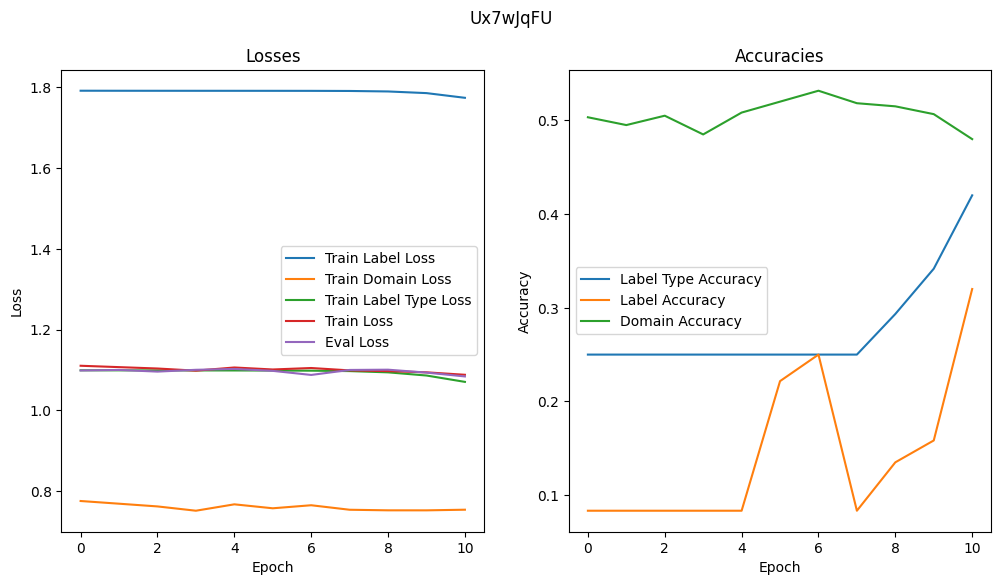

Epoch [11/50]	                         Avg Train Loss: 1.087957	                         Avg Eval Loss: 1.083834	                         Avg Domain Accuracy: 0.48	                         Avg Label Type Accuracy: 0.42	                         Avg Total Eval Accuracy: 0.32


Epoch [12/50]	                         Avg Train Loss: 1.069503	                         Avg Eval Loss: 1.065232	                         Avg Domain Accuracy: 0.49	                         Avg Label Type Accuracy: 0.41	                         Avg Total Eval Accuracy: 0.33


Epoch [13/50]	                         Avg Train Loss: 1.034823	                         Avg Eval Loss: 0.989498	                         Avg Domain Accuracy: 0.49	                         Avg Label Type Accuracy: 0.41	                         Avg Total Eval Accuracy: 0.33


Epoch [14/50]	                         Avg Train Loss: 0.924102	                         Avg Eval Loss: 0.849627	                         Avg Domain Accuracy: 0.51	                         Avg Label Type Accuracy: 0.41	                         Avg Total Eval Accuracy: 0.33


Epoch [15/50]	                         Avg Train Loss: 0.816146	                         Avg Eval Loss: 0.796196	                         Avg Domain Accuracy: 0.48	                         Avg Label Type Accuracy: 0.44	                         Avg Total Eval Accuracy: 0.34


Epoch [16/50]	                         Avg Train Loss: 0.745816	                         Avg Eval Loss: 0.712405	                         Avg Domain Accuracy: 0.50	                         Avg Label Type Accuracy: 0.55	                         Avg Total Eval Accuracy: 0.21


In [1]:
import os
os.chdir('/workspace')
from trainer import * 

cfg = {
    "name": "DANN",
    #
    ### DataLoader ###
    # "n_classes": 12,
    # "n_types": 4,

    "n_classes": 6,
    "n_types": 3,

    'label_type_to_labels' : {
        'yes_no': ['yes', 'no'],
        'colors': ['red', 'blue'],
        'numbers': ['0', '1'],
    },

    #
    "v2_samples_per_answer": 300,
    "abs_samples_per_answer": 300,
    #
    "v2_samples_per_answer_train": 200,
    "abs_samples_per_answer_train": 200,
    #
    "v2_samples_per_answer_val": 50,
    "abs_samples_per_answer_val": 50,
    "source_domain": "v2",
    
    ### VLModel ###
    "image_encoder": "facebook/dinov2-base",
    "text_encoder": "bert-base-uncased",
    #
    ## Embedder
    "num_attn_heads": 8,
    "fusion_mode": "cat",
    "num_stacked_attn": 1,
    "criss_cross__drop_p": 0.5,
    "post_concat__drop_p": 0.0,
    "embed_attn__add_residual": False,
    "embed_attn__drop_p": 0.0,
    #
    ## Label Classifier
    "label_classifier__use_bn": False,
    "label_classifier__drop_p": 0.0,
    "label_classifier__repeat_layers": [2, 2],
    #
    ## Domain Classifier
    "domain_classifier__use_bn": True,
    "domain_classifier__drop_p": 0.5,
    "domain_classifier__repeat_layers": [2, 2],
    #
    ### Objective ###
    "domain_adaptation_method": "domain_adversarial",  # 'naive', 'importance_sampling', 'domain_adversarial'
    #
    ### Trainer ###
    "relaxation_period": 3,
    "epochs": 50,
    "batch_size": 150,
    "base_lr": 4e-5,
    "weight_decay": 1e-5,
    #
    ### Logging ###
    # "print_logs": False,
    "print_logs": True,
    "show_plot": True,
    "weights_save_root": "./weights/raw",
}

if True:
    # v2
    cfg["source_domain"] = "v2"
    trainer = DA_Trainer(cfg, vqa_v2, vqa_abs)
    v2_ckpt_path = cfg["weights_save_path"]

    trainer.train(show_plot=True)

    # abs
    cfg["source_domain"] = "abs"
    trainer = DA_Trainer(cfg, vqa_v2, vqa_abs)
    abs_ckpt_path = cfg["weights_save_path"]

    trainer.train(show_plot=False)